# Assignment 4
## Learning Outcomes
We will continue on the use of randomization and Monte-Carlo simulation tests to determine whether a specific effect is statistically significant. Randomization and simulation tests are universal and powerful way to do this, and form an essential part of the toolkit of any Data Scientist. 
## Problem Description
In Task 1 & 2, we continue with the movie dataset. The first two task build and run randomization tests with two new test statistics. In Task 3 you are asked to program a simple monte-Carlo simulation test.  

In [140]:
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt 
%matplotlib inline

import numpy as np
import pandas as pd

In [141]:
df = pd.read_csv('movieDataset.csv')
df.head()

,Unnamed: 0,boxoff,prodcost,dirIncome,dirGender,year,month,genre,numTheatres
0,0,88.648583,44.742936,1.143234,male,2012,3,comedy,139
1,1,145.334924,38.835516,3.393535,female,2014,11,drama,213
2,2,238.265684,29.532283,2.418883,male,2015,6,other,100
3,3,212.714742,157.111899,2.034115,male,2014,10,adventure,436
4,4,120.175461,30.547155,0.963219,female,2012,1,comedy,115


## TASK 1: Chi-square test of independence (40pts)
To test whether two discrete variables interact with each other, you can perform the Chi-sqaure test. The Chi-square statistic measures the deviation of the observed cell counts in a contingency table to the expected counts (see lecture).  
### Question 1: Null-hypothesis (5pts)
We want to test the hypothesis that there is a systematic relationship between director Gender and film genre. Please formulate the corresponding Null-hypothesis.

In [142]:
#The null-hypothesis in this case would be that there is no systematic relationship between director gender and film genre
#In other words, the null-hypothesis says that director gender and genre are independent

### Question 2: Expected frequencies (10pts)
From the table of the observed frequencies of genre / director Gender, generate a table that shows the expected frequencies if genre and gender were independent. The Marginal counts in the table should stay unchanged. 

In [143]:
#Creating the expected value array starting with the observed table
obsvTable = pd.crosstab(df['dirGender'], df['genre'])
obsvArray = np.array(obsvTable)
[nCol, nRow] = obsvArray.shape
expArray = np.zeros([nCol, nRow])

#Filling in the expected array
for i in range(nCol):
    for j in range(nRow):
        compA = np.sum(obsvArray[i, :])
        compB = np.sum(obsvArray[:, j])
        tableTotal = np.sum(obsvArray.flatten())
        expArray[i, j] = (compA*compB)/tableTotal
        
#Turning the expected array into a table
expTable = pd.DataFrame(expArray)
expTable.columns = obsvTable.columns
expTable.index = obsvTable.index
display(expTable)

genre,action,adventure,comedy,drama,other
dirGender,,,,,
female,8.436,9.472,7.104,5.328,6.66
male,48.564,54.528,40.896,30.672,38.34


### Question 3: Chi-square (10pts)
Create one function that takes the data frame as input and calculates a statistics of the overall deviation between expected and observed frequencies: 
$χ^2 = \sum_i(O_i-E_i)^2/E_i)$ 

Where $O_i$ is the observed frequency for cell $i$, $E_i$ is the expected frequency for cell $i$, assuming independence of gender and genre. The sum is to be taken over all 10 cells. This test-statistic is called the Chi-square test of independence.

Report the value of this statistic for the real data. 


In [144]:
def chiCalc(dataframe):
    #Creating the expected value array
    obsvTable = pd.crosstab(dataframe['dirGender'], dataframe['genre'])
    obsvArray = np.array(obsvTable)
    [nCol, nRow] = obsvArray.shape
    expArray = np.zeros([nCol, nRow])

    #Filling in the values for the expected array
    for i in range(nCol):
        for j in range(nRow):
            compA = np.sum(obsvArray[i, :])
            compB = np.sum(obsvArray[:, j])
            tableTotal = np.sum(obsvArray.flatten())
            expArray[i, j] = (compA*compB)/tableTotal
    
    #Calculating the Chi-square statistic
    chiValue = ((obsvArray - expArray)**2) / expArray
    X = np.sum(chiValue.flatten())
    
    return X
    

In [145]:
#Function testing
chiS = chiCalc(df)
print(f'The result of the Chi-square test is: {chiS}')

The result of the Chi-square test is: 8.552102881235573


### Question 4: Randomization with flexible input arguments (5pts)
Rewrite the randomization function from the last homework, so it it becomes more versatile by adding additional input arguments that determines the behavior of the routine. 

- The first argument should still be a dataframe (as before)
- The second input argument should be a function that computes the test statistics. All test-statistic functions are assumed to take the data frame as the first and only input. 
- The third input argument is the name of the dataframe column that is being shuffled. 
- An optional input argument: the number of iterations (default=500)
- An optional input argument: the number of sides of the test (1 or 2; default = 1). If the test is two-sided, then count the number of cases where the absolute value of the test statistic (np.abolute) is larger or equal to the real test statistic.
- An optional input argument: The number of bins for plotting the histogram 


In [146]:
def randomTest(dataframe, fcn, shuffle, numIter = 500, numSides = 1, numBins = 15):
    #Creating stat array
    statsArray = np.zeros([numIter])
    
    #Creating a copy of the indices of the dataframe and the dataframe itself
    df_copy = dataframe.copy()
    indices = np.arange(len(df_copy))
    
    #Shuffling the shuffle-able variable for the test
    for i in range(numIter):
        np.random.shuffle(indices)
        shuffleVar = df_copy[shuffle].iloc[indices]
        shuffleVar = shuffleVar.reset_index(drop = 1)
        df_copy[shuffle] = shuffleVar
        
        statsArray[i] = fcn(df_copy)
    
    #Plot the data calculated above and show the actual value as a line
    statsDiff = fcn(df)
    plt.hist(statsArray, bins = numBins)
    plt.xlabel('Male-Female Income')
    plt.ylabel('Frequency')
    plt.axvline(statsDiff, color = 'r')
    
    #Calculate the p-value
    H0 = statsArray > statsDiff
    p = sum(H0)/len(statsArray)
    
    return p

### Question 5: Randomization test (5pts)
Perform a randomization test for the Chi-square test of independence. Your function should plot the histogram and report the p-value.

P-value using chiCalc: 0.058


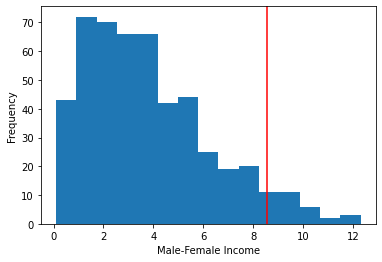

In [147]:
#Function testing
pValue1 = randomTest(df, chiCalc, 'dirGender')
print(f'P-value using chiCalc: {pValue1}')

Figure 1: Randomization test using the Chi-square method

### Question 6: Conclusion (5pts)
Written response: Based on the results, what can you conclude from this test? 

In [148]:
#Based on the results of the Chi-Square test, I can conclude that the test is not itself statistically significant since it is near a p-value of 0.05
#It also tells us that we do not reject the null hypothesis but we are close to the margin so we should consider it.

# TASK 2: Randomization test for mean differences (25pts)
In this task we will test the hypothesis that male and female directors differ in their annual income. Note that the hypothesis is undirected, meaning it could mean either that men earn more than women, or that women earn more than men.

### Question 1: Null hypothesis (5pts)
Formulate the Null-hypothesis. 

In [149]:
#The null-hypothesis states that male and female directors do not differ in annual income

### Question 2: Difference of means (8pts)
Write a function that calculates and returns the difference in director salaries depending on the gender (male average income – female average income). Report the value. 

In [150]:
def meanDiff(dataframe):
    #Grouping the dirIncome and dirGender categories for easy calculations
    incByGender = dataframe['dirIncome'].groupby(dataframe['dirGender'])

    #Getting each gendered group and finding the mean difference between them
    maleInc = incByGender.get_group('male')
    femaleInc = incByGender.get_group('female')
    iDiff = maleInc.mean() - femaleInc.mean()
    
    return iDiff

### Question 3:  Randomization test (7pts)
Use your randomization test function to perform a randomization test to determine whether the reported difference is statistical significant. Plot a histogram of the null-distribution and the real value. Report the p-value for the two-sided test. 

P-value using meanDiff: 0.002


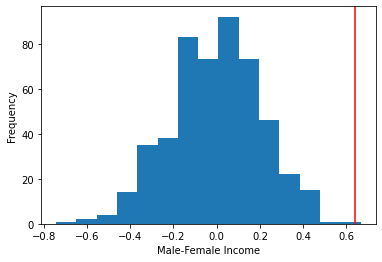

In [151]:
#Function testing
pValue2 = randomTest(df, meanDiff, 'dirGender')
print(f'P-value using meanDiff: {pValue2}')

Figure 2: Randomization test for the mean difference of gendered director incomes

### Question 4: Conclusion (5pts)
What do you conclude about the relationship between gender and salary? What can you conclude about the claim that there is gender discrimination in the American film industry?  


In [152]:
#Given the results of this test, I can conclude that the test is statistcally significant and that we should reject the null hypothesis.

# Task 3: Monte-Carlo simulation test (35pt)
People providing an organ for donation sometimes seek help from a medical consultant. These consultants assist the patient in all aspects of the surgery. Patients might choose a consultant based in part on the historical complication rate of the consultant's clients. Consultant R tries to attract patients by noting the average complication rate for liver donor surgeries in the US is about 10%, but her clients have had only 3 complications in the 62 liver donor surgeries she has facilitated. She claims this is strong evidence that her work meaningfully contributes to reducing complications (and therefore she should be hired!).
### Question 1: Monte Carlo simulation (15pts)
Write a function (monteCarloSim) that simulates coin tossing. On each trial, the function should produce a specific number (N) of coin tosses and record the number of successes (heads). It should repeat this experiment numIter number of times. The inputs to the function should be a) probability of a success on each coin toss, b) the number of coin tosses per trial (N) and c) the number of trials. The function should return an np.array(range(numIter)) that holds the recorded number of heads for all trials (see lecture handout for tips).

In [153]:
def coinSim(pSuccess, N, numTrials):
    #Heads = 1
    #Tails = 0
    
    #Creating the head counting array
    headArray = np.zeros([numTrials])
    
    #Flipping the coin and filling the array with the number of heads for each trial
    for i in range(numTrials):
        coinToss = np.random.choice(a = [0, 1], size = N, replace = True, p = [1 - pSuccess, pSuccess])
        numHeads = np.sum(coinToss)
        headArray[i] = numHeads
    
    return headArray

In [154]:
#Function testing
mcSim = coinSim(0.3, 50, 2)
print(type(mcSim))
print(mcSim.shape)
print(mcSim)

<class 'numpy.ndarray'>
(2,)
[14. 16.]


### Question 2: Monte Carlo Test (15pts)
Write a function (monteCarloTest) that uses monteCarloSim to simulate 1000 trials. The function should also plot a histogram of the recorded number of heads, and mark the real measured number with a vertical line. The function should print out the probability that the simulated number of heads is smaller than or equal to the measured number of heads. Input arguments should be a) the probability of a success under the Null-hypothesis, b) the number of coin tosses per trial, and c) the measured number of heads. Use the function to evaluate the probability to get 3 complications in 62 cases if the probability of a complication in the population is known to be 10%. 

In [155]:
def coinTest(pSuccess, N, numHeads):
    #Simulate the coin flipping
    headArray = coinSim(pSuccess, N, 1000)
    
    #Plot the simulated data and put the real data as a line
    plt.hist(headArray, bins = 20)
    plt.xlabel('Number of Observed Heads')
    plt.ylabel('Frequency')
    plt.axvline(x = numHeads, color = 'black')
    
    #Calculate p-value
    p = sum(headArray >= numHeads)/len(headArray)
    
    return p

The probability of the Monte-Carlo Test is: 0.948


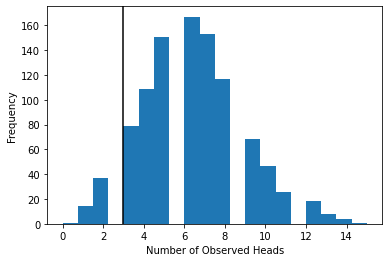

In [156]:
#Function testing
coinP = coinTest(0.1, 62, 3)
print(f'The probability of the Monte-Carlo Test is: {coinP}')

Figure 3: Monte-Carlo test of a coin tossing with 1000 trials

### Question 3: Conclusion (5pts)
Written answer: What do you conclude about the claim that the work of advisor R is lowering complication rates?

In [157]:
#Given the results of the test, I can conclude that the test is not statistically significant and that we do not reject the null hypothesis in this case